<a href="https://colab.research.google.com/github/Thanakorn2717/All_Data_Analytics_Projects/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.duplicated().any()

False

In [9]:
df_data.isnull().any()

,0
Unnamed: 0.1,False
Unnamed: 0,False
Organisation,False
Location,False
Date,False
Detail,False
Rocket_Status,False
Price,True
Mission_Status,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [10]:
df_cleaned = df_data.drop(['Unnamed: 0.1',  'Unnamed: 0'], axis=1)

In [11]:
df_cleaned.isnull().sum()

,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


## Descriptive Statistics

In [12]:
df_cleaned.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [14]:
df_cleaned.describe(include='all')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [15]:
#Price should be float not str.
df_cleaned["Price"] = df_cleaned["Price"].str.replace(',' , '').astype(float)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [17]:
df_cleaned.describe(include='all')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964.00,4324
unique,56,137,4319,4278,2,NaN,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
freq,1777,235,2,6,3534,NaN,3879
mean,NaN,NaN,NaN,NaN,NaN,153.79,NaN
std,NaN,NaN,NaN,NaN,NaN,288.45,NaN
min,NaN,NaN,NaN,NaN,NaN,5.30,NaN
25%,NaN,NaN,NaN,NaN,NaN,40.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,62.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,164.00,NaN


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
df_cleaned['Organisation'].value_counts()

,count
Organisation,
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [19]:
df_cleaned['Organisation'].value_counts(normalize=True) #Proportion

,proportion
Organisation,
RVSN USSR,0.41
Arianespace,0.06
CASC,0.06
General Dynamics,0.06
NASA,0.05
VKS RF,0.05
US Air Force,0.04
ULA,0.03
Boeing,0.03


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [20]:
df_cleaned['Rocket_Status'].value_counts()

,count
Rocket_Status,
StatusRetired,3534
StatusActive,790


In [21]:
df_cleaned['Rocket_Status'].value_counts(normalize=True) #Proportion

,proportion
Rocket_Status,
StatusRetired,0.82
StatusActive,0.18


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
df_cleaned['Mission_Status'].value_counts()


,count
Mission_Status,
Success,3879
Failure,339
Partial Failure,102
Prelaunch Failure,4


In [23]:
df_cleaned['Mission_Status'].value_counts(normalize=True) #Proportion

,proportion
Mission_Status,
Success,0.90
Failure,0.08
Partial Failure,0.02
Prelaunch Failure,0.00


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

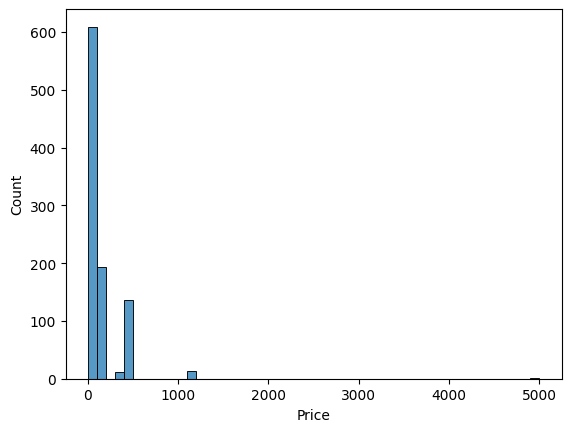

In [24]:
# Since 75% Price data in this dataset is missing values.
# Imputing them will lead to significant bias.
# Therefore, I decide to analyze only the complete cases (available data)

sns.histplot(
    data=df_cleaned,
    x='Price',
    binwidth=100
)

plt.show()

#sns.hisplot() ignore missing values by default.

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [25]:
df_cleaned["Country"] = df_cleaned["Location"].str.split(", ").str[-1]
# Get the column order
columns = list(df_cleaned.columns)

# Move the fifth column ('Col5') to the third position
columns.insert(2, columns.pop(7))

# Reorder the DataFrame
df_cleaned = df_cleaned[columns]

df_cleaned.head()

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [26]:
df_cleaned["Country"].value_counts()

,count
Country,
Russia,1395
USA,1344
Kazakhstan,701
France,303
China,268
Japan,126
India,76
Pacific Ocean,36
New Zealand,13


In [27]:
df_cleaned["Country"] = df_cleaned["Country"].replace(
    {"Russia": "Russian Federation",
     "New Mexico": "USA",
     "Yellow Sea" : "China",
     "Shahrud Missile Test Site" : "Iran",
     "Barents Sea" : "Russian Federation",
     "Gran Canaria": "USA",
     "Pacific Missile Range Facility": "USA"})

In [28]:
df_cleaned["Country"].value_counts()

,count
Country,
Russian Federation,1398
USA,1351
Kazakhstan,701
France,303
China,269
Japan,126
India,76
Pacific Ocean,36
Iran,14


# Use a Choropleth Map to Show the Number of Failures by Country


In [29]:
df_failures = df_cleaned[df_cleaned["Mission_Status"] == "Failure"]

df_failures_countries = df_failures.groupby('Country', as_index=False)['Mission_Status'].count()
df_failures_countries['ISO'] = df_failures_countries['Country'].apply(lambda x: countries.get(x).alpha3 if x in countries else None)
df_failures_countries.sort_values('Mission_Status', ascending=False)

,Country,Mission_Status,ISO
14,USA,129,USA
8,Kazakhstan,72,KAZ
12,Russian Federation,63,RUS
2,China,19,CHN
3,France,13,FRA
7,Japan,10,JPN
4,India,8,IND
5,Iran,8,None
0,Australia,3,AUS
10,North Korea,3,None


In [30]:
world_map = px.choropleth(df_failures_countries,
                          locations='ISO',
                          color='Mission_Status',
                          hover_name='Country',
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [31]:
df_groups = df_cleaned.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).size()
df_groups = df_groups.rename(columns={'size': 'Mission_Status_Count'})  # Rename the 'size' column to 'Mission_Status'

df_groups = df_groups.sort_values("Mission_Status_Count", ascending=False)

In [32]:
df_groups.head()

,Country,Organisation,Mission_Status,Mission_Status_Count
81,Russian Federation,RVSN USSR,Success,1119
58,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
105,USA,General Dynamics,Success,203


In [33]:
burst = px.sunburst(df_groups,
                    path=["Country", "Organisation", "Mission_Status"],
                    values='Mission_Status_Count',
                   )

burst.update_layout(xaxis_title='Number of Mission status',
                    yaxis_title='Country',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [34]:
df_cleaned['Detail'].value_counts()

,count
Detail,
Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Lambda-IV S | Osumi,5
Titan IV(402)B | DSP,5
Titan IIID | KH-11,5
Proton K/Block D | Zond,4
...,...
Ariane 44P | Intelsat 709,1
Ariane 5 G | Cluster,1
Delta II 7925 | Galaxy 9,1


In [35]:
expense_per_mission = df_cleaned.groupby(['Organisation', 'Detail'], as_index=False)['Price'].sum()
#Missing value is considered as 0 under sum aggregation

In [36]:
expense_per_mission.sort_values('Price', ascending = False)

,Organisation,Detail,Price
2367,RVSN USSR,Energiya/Polyus | Polyus Space Station,"5,000.00"
2366,RVSN USSR,Energiya/Buran | Buran,"5,000.00"
1547,NASA,Saturn V | Skylab 1,"1,160.00"
1542,NASA,Saturn V | Apollo 17,"1,160.00"
1535,NASA,Saturn V | Apollo 10,"1,160.00"
...,...,...,...
1874,RVSN USSR,Cosmos-2I (63SM) | Cosmos 285,0.00
1875,RVSN USSR,Cosmos-2I (63SM) | Cosmos 295,0.00
1876,RVSN USSR,Cosmos-2I (63SM) | Cosmos 303,0.00
1877,RVSN USSR,Cosmos-2I (63SM) | Cosmos 307,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [37]:
df_cleaned['Organisation'].value_counts()

,count
Organisation,
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [38]:
org_launches = df_cleaned['Organisation'].value_counts().reset_index(name='Launches')

In [39]:
org_launches_lower50 = org_launches[org_launches['Launches'] < 50]
org_launches_lower50

,Organisation,Launches
16,ILS,46
17,Sea Launch,36
18,ISAS,30
19,Kosmotras,22
20,US Navy,17
21,ISA,13
22,Rocket Lab,13
23,Eurockot,13
24,ESA,13
25,Blue Origin,12


In [40]:
org_expense_lower50 = df_cleaned[df_cleaned['Organisation'].isin(org_launches_lower50['Organisation'])]
org_expense_lower50 = org_expense_lower50.groupby('Organisation')['Price'].median().reset_index().fillna(0)
org_expense_lower50

,Organisation,Price
0,AEB,0.00
1,AMBA,0.00
2,ASI,0.00
3,Arm??e de l'Air,0.00
4,Blue Origin,0.00
5,CASIC,0.00
6,CECLES,0.00
7,CNES,0.00
8,Douglas,0.00
9,EER,20.00


In [41]:
org_launches_upper50 = org_launches[org_launches['Launches'] >= 50]
org_launches_upper50

,Organisation,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [42]:
org_expense_upper50 = df_cleaned[df_cleaned['Organisation'].isin(org_launches_upper50['Organisation'])]
org_expense_upper50 = org_expense_upper50.groupby('Organisation')['Price'].median().reset_index().fillna(0)
org_expense_upper50
# Price distribution for some organizations are skew. Using median will be appropriate choice than mean  for Price launch/time

,Organisation,Price
0,Arianespace,200.00
1,Boeing,164.00
2,CASC,30.80
3,General Dynamics,0.00
4,ISRO,31.00
5,Lockheed,35.00
6,MHI,90.00
7,Martin Marietta,35.00
8,NASA,450.00
9,Northrop,40.00


In [43]:
# With org launches lower 50 times, they tend to have missing values more significantly than upper 50 times
# Anyway, I will conclude all of them together again in last table.

all_org_expense = df_cleaned.groupby('Organisation')['Price'].median().reset_index().fillna(0)
all_org_expense.sort_values("Price", ascending = False)
# Price distribution for some organizations are skew. Using median will be appropriate choice than mean for Price launch/time

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,450.00
3,Arianespace,200.00
6,Boeing,164.00
48,ULA,123.00
19,ILS,109.00
32,MHI,90.00
49,US Air Force,59.00
46,SpaceX,56.50
42,Roscosmos,48.50


# Chart the Number of Launches per Year

In [44]:
df_cleaned.head()

,Organisation,Location,Country,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [45]:
df_cleaned['Year'] = df_cleaned['Date'].str.split(", ").str[1].str.split(" ").str[0]

In [46]:
columns = ["Organisation", "Location", "Country", "Date", "Year", "Detail", "Rocket_Status", "Price", "Mission_Status"]
df_cleaned = df_cleaned[columns]

df_cleaned.head()

,Organisation,Location,Country,Date,Year,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",2020,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",2020,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",2020,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",2020,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",2020,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [47]:
launch_per_year = df_cleaned["Year"].value_counts().reset_index()

In [48]:
launch_per_year = launch_per_year.sort_values("Year")

In [49]:
launch_per_year.head()

,Year,count
63,1957,3
61,1958,28
62,1959,20
57,1960,39
42,1961,52


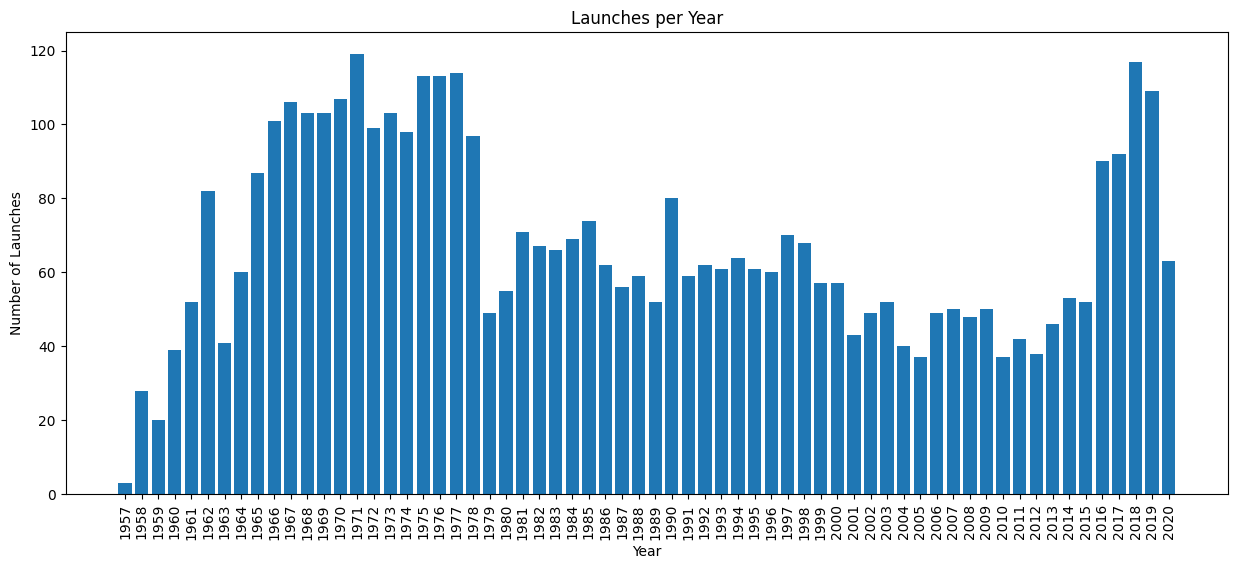

In [50]:
plt.figure(figsize=(15, 6))

plt.bar(
    launch_per_year["Year"],
    launch_per_year["count"]
    )

plt.title("Launches per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.xticks(rotation=90)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [51]:
df_cleaned['Month'] = df_cleaned['Date'].str.split(", ").str[0].str.split(" ").str[1]

In [52]:
columns = ["Organisation", "Location", "Country", "Date", "Year", "Month", "Detail", "Rocket_Status", "Price", "Mission_Status"]
df_cleaned = df_cleaned[columns]

df_cleaned.head()

,Organisation,Location,Country,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",2020,Aug,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",2020,Jul,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",2020,Jul,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [53]:
launch_per_month = df_cleaned["Month"].value_counts().reset_index()
launch_per_month

,Month,count
0,Dec,450
1,Jun,402
2,Apr,383
3,Oct,381
4,Aug,373
5,Sep,365
6,Mar,353
7,Jul,351
8,Feb,336
9,Nov,336


In [54]:
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

launch_per_month["Month"] = pd.Categorical(launch_per_month["Month"], categories=month_order, ordered=True)

# Step 3: Sort the DataFrame by the 'Month' column
launch_per_month_ordered = launch_per_month.sort_values("Month")
launch_per_month_ordered.head(12)

,Month,count
11,Jan,268
8,Feb,336
6,Mar,353
2,Apr,383
10,May,326
1,Jun,402
7,Jul,351
4,Aug,373
5,Sep,365
3,Oct,381


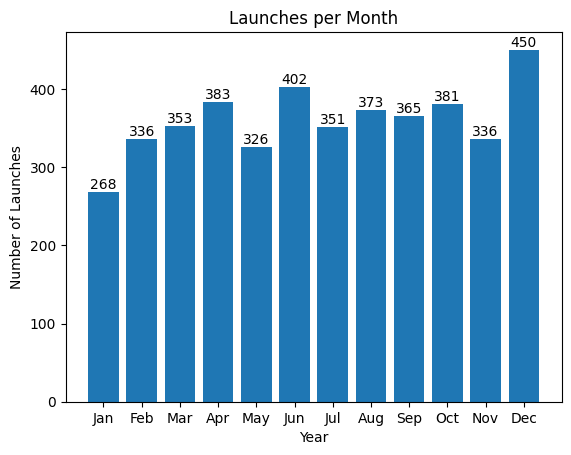

In [55]:
plt.bar(
    launch_per_month_ordered["Month"],
    launch_per_month_ordered["count"]
    )

plt.title("Launches per Month")
plt.xlabel("Year")
plt.ylabel("Number of Launches")

for _ , row in launch_per_month_ordered.iterrows():
    plt.text(
        row["Month"],  # x-coordinate (bar's position)
        row["count"],  # y-coordinate
        str(row["count"]),  # Label text
        ha="center",  # Horizontal alignment
        va="bottom",  # Vertical alignment
        fontsize=10,  # Font size
    )

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [56]:
launch_per_month

,Month,count
0,Dec,450
1,Jun,402
2,Apr,383
3,Oct,381
4,Aug,373
5,Sep,365
6,Mar,353
7,Jul,351
8,Feb,336
9,Nov,336


In [57]:
#Most popular month
launch_per_month.head(1)

,Month,count
0,Dec,450


In [58]:
#Least popular month
launch_per_month.tail(1)

,Month,count
11,Jan,268


# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [59]:
price_per_year = df_cleaned.groupby('Year').agg(Avg_price=('Price', 'mean')).reset_index()
#Aggregating with mean ignore missing values by default

In [60]:
price_per_year = price_per_year.sort_values("Year").dropna()
price_per_year

,Year,Avg_price
7,1964,63.23
8,1965,63.23
9,1966,59.00
10,1967,196.62
11,1968,279.20
12,1969,609.50
13,1970,"1,160.00"
14,1971,"1,160.00"
15,1972,"1,160.00"
16,1973,"1,160.00"


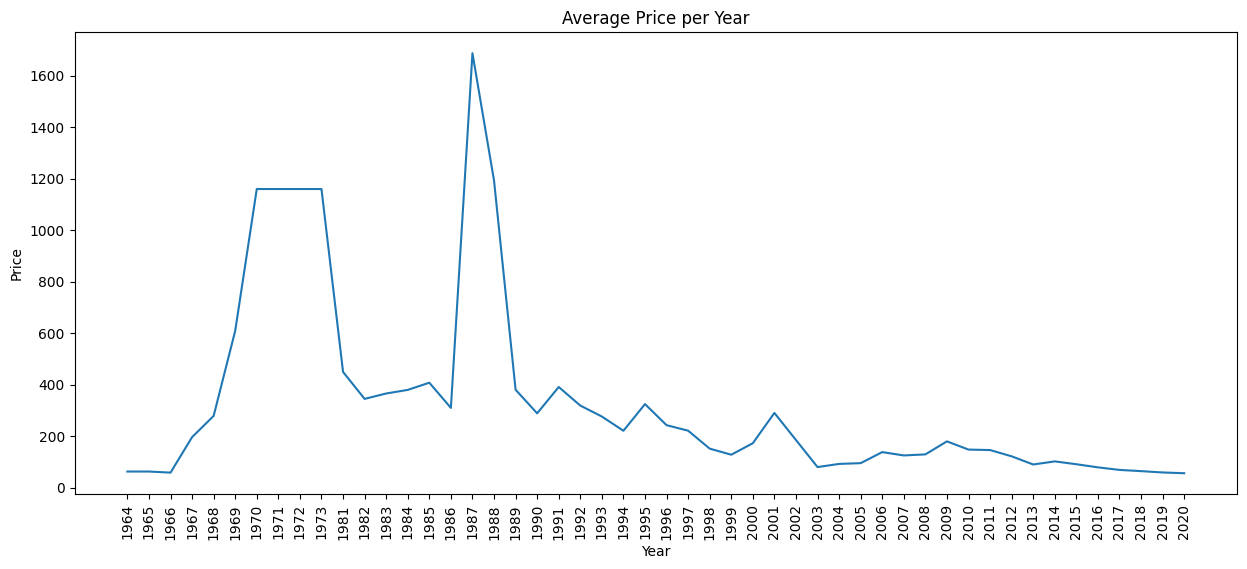

In [61]:
plt.figure(figsize=(15, 6))

sns.lineplot(
    data = price_per_year,
    x = "Year",
    y = "Avg_price"
)

plt.title("Average Price per Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation = 90)

plt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [62]:
top_10_org = df_cleaned["Organisation"].value_counts().reset_index(name="Launches").head(10) # rename "count" column to  "Launches"

org_launch_per_year = df_cleaned[df_cleaned["Organisation"].isin(top_10_org["Organisation"])]
org_launch_per_year = org_launch_per_year[["Organisation", "Year"]].value_counts().reset_index(name="Launches")  # rename "count" column to  "Launches"
org_launch_per_year = org_launch_per_year.sort_values(["Organisation", "Year"]).sort_values("Year")

org_launch_per_year

,Organisation,Year,Launches
268,RVSN USSR,1957,2
170,RVSN USSR,1958,5
279,NASA,1958,2
261,US Air Force,1958,2
187,RVSN USSR,1959,4
...,...,...,...
93,VKS RF,2019,8
189,Arianespace,2020,4
210,ULA,2020,4
40,CASC,2020,19


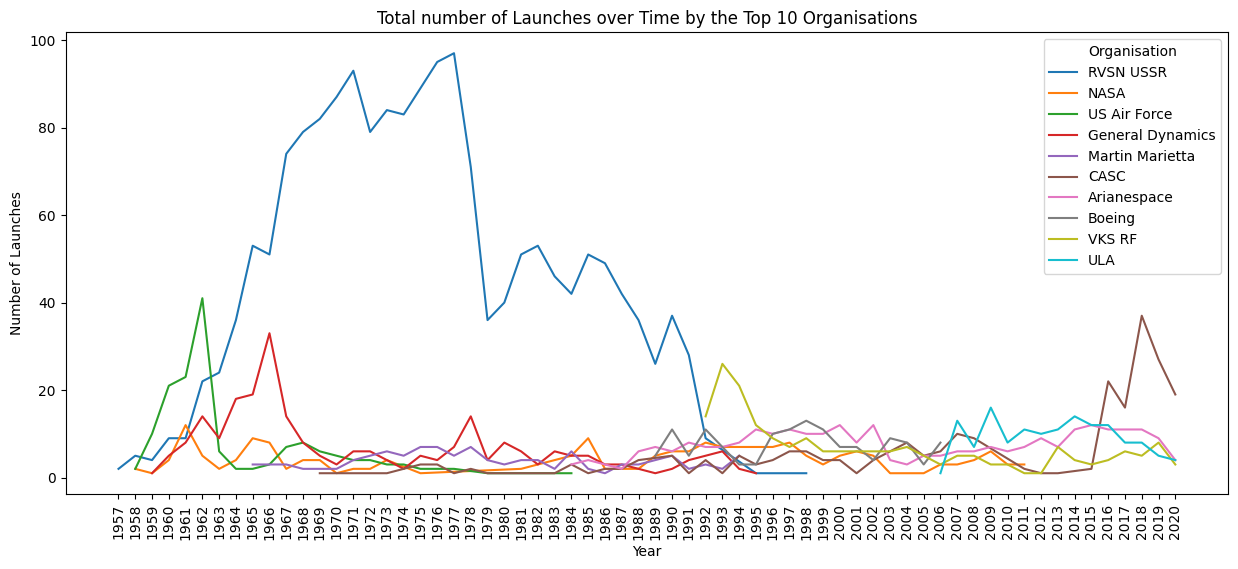

In [63]:
plt.figure(figsize=(15, 6))

sns.lineplot(
    data=org_launch_per_year,
    x="Year",  # x-axis: Year
    y="Launches",  # y-axis: Launches count
    hue="Organisation",  # Different lines for each Organisation
)

plt.title("Total number of Launches over Time by the Top 10 Organisations")
plt.ylabel("Number of Launches")
plt.xticks(rotation = 90)
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [64]:
df_cleaned["Country"].value_counts()

,count
Country,
Russian Federation,1398
USA,1351
Kazakhstan,701
France,303
China,269
Japan,126
India,76
Pacific Ocean,36
Iran,14


In [65]:
until_1991 = df_cleaned[df_cleaned['Year'] <= '1991']

USSR_vs_USA = until_1991.query("Country=='Russian Federation' | Country=='Kazakhstan' | Country=='USA'")
USSR_vs_USA = USSR_vs_USA['Country'].value_counts().reset_index(name="Launches")
USSR_vs_USA["Country"] = USSR_vs_USA["Country"].replace({'Russian Federation': 'USSR', 'Kazakhstan': 'USSR'})
USSR_vs_USA = USSR_vs_USA.groupby('Country')['Launches'].sum().reset_index()

USSR_vs_USA['Proportion'] = USSR_vs_USA['Launches']/USSR_vs_USA['Launches'].sum()
USSR_vs_USA

,Country,Launches,Proportion
0,USA,662,0.27
1,USSR,1770,0.73


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [66]:
fig = px.pie(labels=USSR_vs_USA["Country"],
             values=USSR_vs_USA['Launches'],
             title="Total number of launches USSR vs USA",
            names=USSR_vs_USA["Country"],)

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [67]:
USSR_vs_USA = until_1991.query("Country=='Russian Federation' | Country=='Kazakhstan' | Country=='USA'")
USSR_vs_USA["Country"] = USSR_vs_USA["Country"].replace({'Russian Federation': 'USSR', 'Kazakhstan': 'USSR'})
USSR_vs_USA = USSR_vs_USA.groupby(['Year', 'Country'])['Organisation'].count().reset_index(name="Launches")
USSR_vs_USA

<ipython-input-67-415156f01c3e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Country,Launches
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
65,1989,USSR,26
66,1990,USA,26
67,1990,USSR,37
68,1991,USA,18


[]

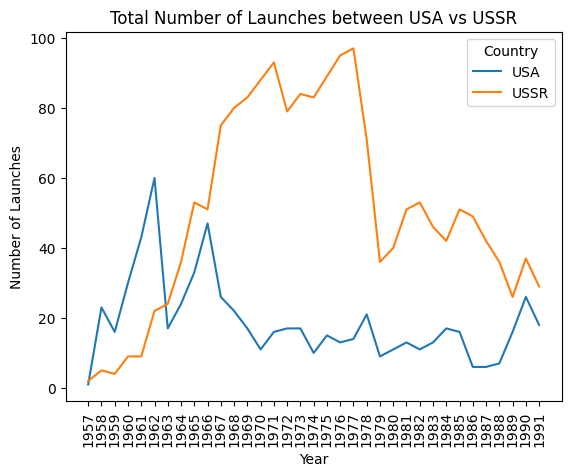

In [68]:
sns.lineplot(
    data=USSR_vs_USA,
    x='Year',
    y='Launches',
    hue='Country'
)
plt.title("Total Number of Launches between USA vs USSR")
plt.ylabel("Number of Launches")
plt.xticks(rotation=90)
plt.plot()

#The largest difference in missile launches between the USA and the USSR from 1975-1978 reflects:
        # The USSR’s aggressive expansion in missile and space activities.
        # The USA’s strategic pause in launches, suspect they invested in other development.

## Chart the Total Number of Mission Failures Year on Year.

In [69]:
df_cleaned.head()

,Organisation,Location,Country,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",2020,Aug,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",2020,Jul,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",2020,Jul,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [70]:
df_failures = df_cleaned[df_cleaned['Mission_Status'] == 'Failure']
df_failures = df_failures['Year'].value_counts().reset_index(name="Failures").sort_values('Year')
df_failures

,Year,Failures
63,1957,1
1,1958,20
12,1959,9
0,1960,20
2,1961,17
...,...,...
45,2016,2
21,2017,6
47,2018,2
18,2019,6


[]

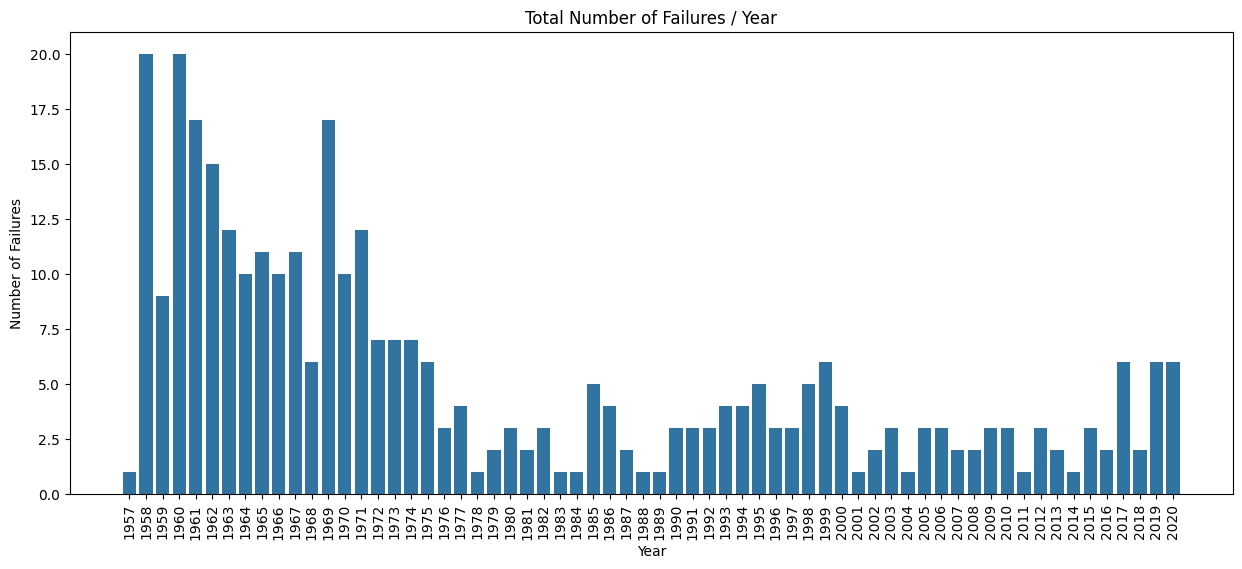

In [72]:
plt.figure(figsize=(15, 6))

sns.barplot(
    data=df_failures,
    x='Year',
    y='Failures'
)
plt.title("Total Number of Failures / Year")
plt.ylabel("Number of Failures")
plt.xticks(rotation=90)
plt.plot()

#As total number of Launches was decreased, total number of failures was decreased as well.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [73]:
df_cleaned.head()

,Organisation,Location,Country,Date,Year,Month,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,"Fri Aug 07, 2020 05:12 UTC",2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China,"Thu Aug 06, 2020 04:01 UTC",2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",USA,"Tue Aug 04, 2020 23:57 UTC",2020,Aug,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC",2020,Jul,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",USA,"Thu Jul 30, 2020 11:50 UTC",2020,Jul,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [89]:
df_total = df_cleaned.groupby('Year')['Mission_Status'].count().rename('Total_Status').reset_index()
df_total

,Year,Total_Status
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [90]:
df_failures = df_cleaned[df_cleaned['Mission_Status'] == "Failure"]
df_failures = df_failures.groupby('Year')['Mission_Status'].count().rename('Failure_Status').reset_index()
df_failures

,Year,Failure_Status
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17
...,...,...
59,2016,2
60,2017,6
61,2018,2
62,2019,6


In [94]:
df_joined = df_failures.merge(df_total, on='Year', how='inner')
df_joined['Failure_pct'] = df_joined['Failure_Status']/df_joined['Total_Status']
df_joined

,Year,Failure_Status,Total_Status,Failure_pct
0,1957,1,3,0.33
1,1958,20,28,0.71
2,1959,9,20,0.45
3,1960,20,39,0.51
4,1961,17,52,0.33
...,...,...,...,...
59,2016,2,90,0.02
60,2017,6,92,0.07
61,2018,2,117,0.02
62,2019,6,109,0.06


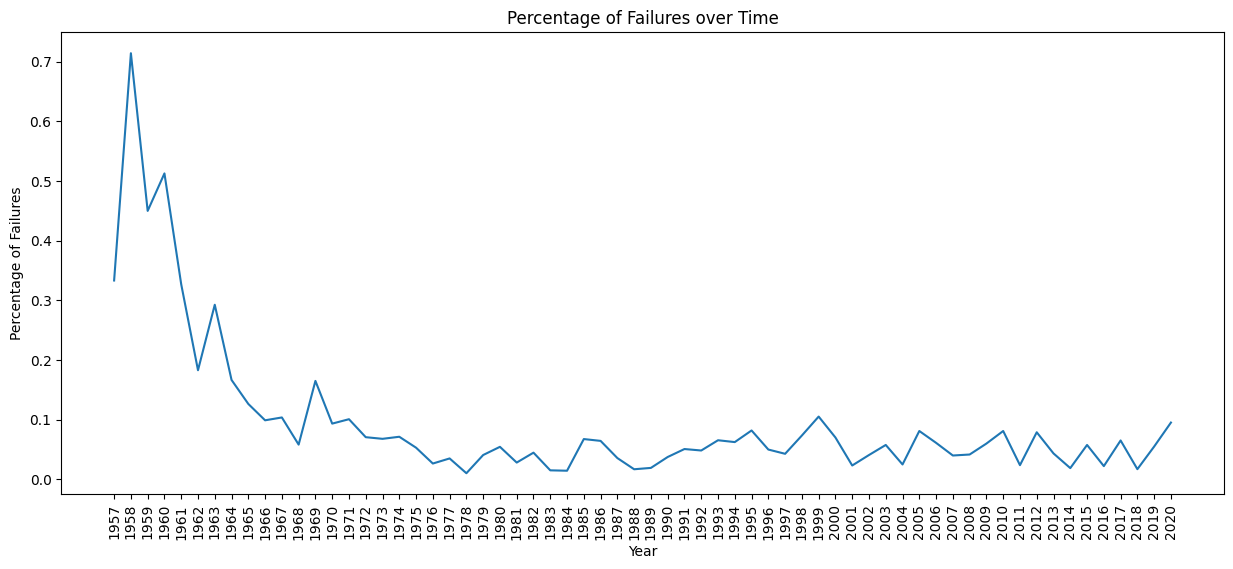

In [97]:
plt.figure(figsize=(15, 6))

sns.lineplot(
    data=df_joined,
    x='Year',
    y='Failure_pct'
)

plt.title('Percentage of Failures over Time')
plt.ylabel('Percentage of Failures')
plt.xticks(rotation=90)

plt.show()

# Seems like they can find a way to improve failure percentage as long as the time pass.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [102]:
countries_total_launches = df_cleaned['Country'].value_counts().reset_index(name='Total_Launches')
countries_total_launches

,Country,Total_Launches
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,Iran,14
9,New Zealand,13


In [103]:
Horizontal_bar = px.bar(x=countries_total_launches['Total_Launches'],
                        y=countries_total_launches['Country'],
                        orientation='h',
                        title='Countries with Total Launches',
                        color=countries_total_launches['Total_Launches'],
                        color_continuous_scale='Viridis',
                        )

Horizontal_bar.update_layout(xaxis_title='Number of Launches',
                    yaxis_title='Country',
                    yaxis={'categoryorder':'total ascending'},
                    coloraxis_showscale=False)

Horizontal_bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [118]:
org_count = df_cleaned[['Year', 'Organisation']].value_counts().reset_index(name='Launches').sort_values('Year')
org_count.head(15)

,Year,Organisation,Launches
661,1957,US Navy,1
371,1957,RVSN USSR,2
61,1958,US Navy,12
210,1958,RVSN USSR,5
414,1958,US Air Force,2
421,1958,NASA,2
122,1958,AMBA,7
83,1959,US Air Force,10
234,1959,RVSN USSR,4
237,1959,US Navy,4


In [120]:
max_launches_year = org_count.groupby('Year')['Launches'].max().reset_index()
max_launches_year

,Year,Launches
0,1957,2
1,1958,12
2,1959,10
3,1960,21
4,1961,23
...,...,...
59,2016,22
60,2017,18
61,2018,37
62,2019,27


In [137]:
max_launches_org = pd.merge(org_count, max_launches_year, on=['Year', 'Launches'], how="inner")
max_launches_org

,Year,Organisation,Launches
0,1957,RVSN USSR,2
1,1958,US Navy,12
2,1959,US Air Force,10
3,1960,US Air Force,21
4,1961,US Air Force,23
...,...,...,...
66,2016,CASC,22
67,2017,SpaceX,18
68,2018,CASC,37
69,2019,CASC,27


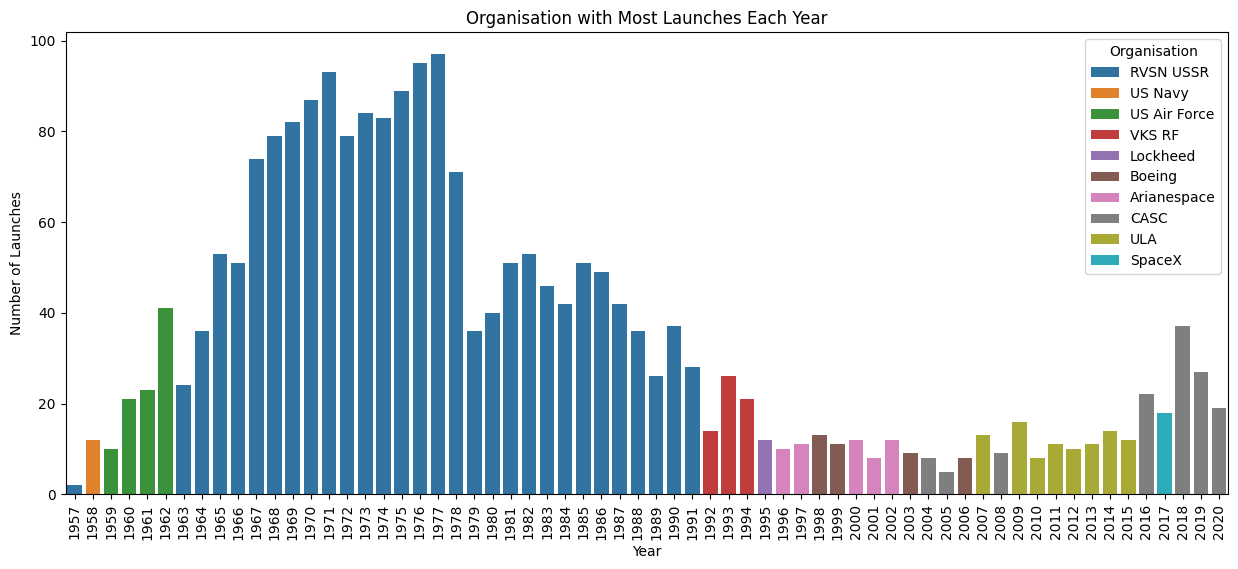

In [159]:
plt.figure(figsize=(15, 6))

sns.barplot(
    data=max_launches_org,
    x='Year',
    y='Launches',
    hue='Organisation',
    dodge=False
)

plt.title("Organisation with Most Launches Each Year")
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)


plt.show()
